<a href="https://colab.research.google.com/github/harnoorsingh08/foodla/blob/main/Loan_Prediction_Harnoor_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [19]:
loan_status_data = pd.read_csv("/content/loanpresiction.zip")

In [20]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
loan_status_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
loan_status_data = loan_status_data.dropna()

In [23]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [24]:
loan_status_data = loan_status_data.replace({"Loan_Status": {'N':0, 'Y':1 }})

In [25]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [26]:
loan_status_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [27]:
loan_status_data = loan_status_data.replace(to_replace='3+', value=4)

In [40]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: xlabel='Dependents', ylabel='count'>

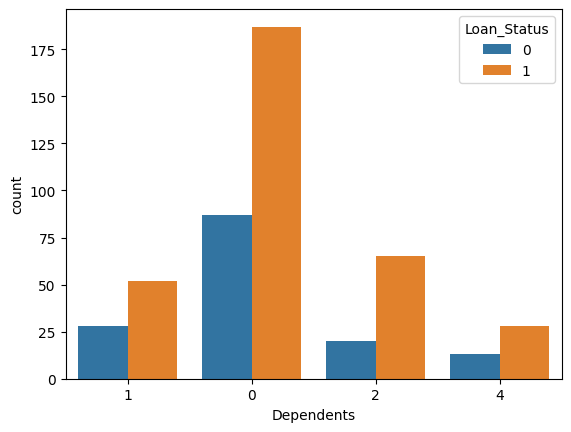

In [39]:
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_status_data)

In [28]:
loan_status_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

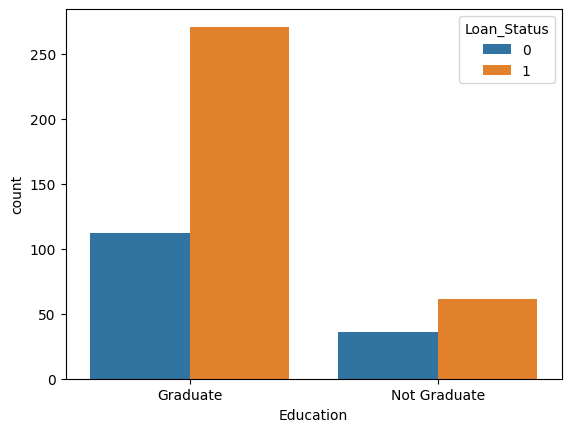

In [29]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_status_data)


In [30]:
# convert categorical columns to numerical values
loan_status_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace = True)

In [31]:
X = loan_status_data.drop(columns = ['Loan_ID', 'Loan_Status'])
Y = loan_status_data['Loan_Status']

In [32]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 1)

In [34]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(384, 11) (384,) (96, 11) (96,)


In [35]:
classifier = svm.SVC(kernel = 'linear')

In [36]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [41]:
X_train_prediction = classifier.predict(X_train)

In [44]:
training_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print(training_accuracy)

0.7994791666666666


In [47]:
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_accuracy)

0.8229166666666666


In [54]:
new_data = pd.DataFrame({
    'Gender': [1, 0, 1],
    'Married': [0, 1, 1],
    'Dependents': [0, 2, 1],
    'Education': [1, 1, 0],
    'Self_Employed': [0, 0, 1],
    'ApplicantIncome': [5000, 6000, 7000],
    'CoapplicantIncome': [0, 1000, 500],
    'LoanAmount': [200, 300, 150],
    'Loan_Amount_Term': [360, 180, 360],
    'Credit_History': [1, 1, 0],
    'Property_Area': [0, 1, 2]
})

predictions = classifier.predict(new_data)


In [55]:
print(predictions)

[1 1 0]
